In [1]:
import pandas as pd

In [2]:
# pip install snowflake-connector-python

In [3]:
# import snowflake.connector
# import csv

# # Snowflake connection parameters
# account = 'su61976.central-india.azure'
# user = 'surajpokhriyal'
# password = 'Snowflake@123'
# warehouse = 'COMPUTE_WH'
# database = 'EMPLOYEESKILLMATRIX'
# schema = 'USER'

# # Connect to Snowflake
# conn = snowflake.connector.connect(
#     user=user,
#     password=password,
#     account=account,
#     warehouse=warehouse,
#     database=database,
#     schema=schema
# )

# # Execute SQL query
# query = 'SELECT * FROM certifications'
# cur = conn.cursor()
# cur.execute(query)

# # Fetch results
# rows = cur.fetchall()

# # Define CSV file path
# csv_file_path = 'certifications_table.csv'

# # Write results to CSV file
# with open(csv_file_path, 'w', newline='') as csv_file:
#     csv_writer = csv.writer(csv_file)
#     # Write column headers
#     csv_writer.writerow([desc[0] for desc in cur.description])
#     # Write data rows
#     csv_writer.writerows(rows)

# # Close Snowflake connection
# cur.close()
# conn.close()

# print(f'Data has been exported to {csv_file_path}')


In [4]:
users_table=pd.read_csv('users_table.csv')
certification_table=pd.read_csv('certifications_table.csv') 
project_table=pd.read_csv('project_table.csv')
skill_table=pd.read_csv('skills_table.csv')
main_table=pd.read_csv('main_table.csv')

In [5]:
main_table

,FIRST_NAME,LAST_NAME,EMAIL,ROLE,DESIGNATION,DATEOFJOINING,PHONE_NUMBER,EMP_ID,YEARS_OF_EXPERIENCE,NUM_SKILLS,NUM_CERTIFICATES,NUM_APPROVED_CERTIFICATES,NUM_REJECTED_CERTIFICATES,NUM_PROJECTS,NUM_APPROVED_PROJECTS,NUM_REJECTED_PROJECTS,PERFORMANCE_METRICS
0,Sosanna,Turford,1sturford0@meetup.com,user,Software Engineer,2001-01-27,118 818 5412,EMP_1,23,9,9,4,5,4,0,4,130
1,Kitty,Jullian,2kjullian1@noaa.gov,user,UI/UX Designer,2013-11-08,514 903 6984,EMP_2,11,5,5,1,4,4,2,2,53
2,Margaux,Aveyard,3maveyard2@mayoclinic.com,user,Technical Lead,2023-11-10,347 430 9674,EMP_3,1,5,5,2,3,4,3,1,75
3,Jamaal,Worral,4jworral3@arizona.edu,user,Technical Writer,2017-07-06,545 819 6067,EMP_4,7,4,4,1,3,4,2,2,31
4,Tallie,Takis,5ttakis4@cocolog-nifty.com,user,UI/UX Designer,2002-08-10,930 390 7831,EMP_5,22,4,4,2,2,4,0,4,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,Ethan,O'Deegan,977eodeeganr4@uiuc.edu,user,Test Engineer,2010-02-02,653 522 2553,EMP_977,14,5,5,4,1,4,3,1,62
998,Marni,Tolemache,986mtolemacherd@shutterfly.com,user,Software Engineer,2001-12-27,911 118 8711,EMP_986,23,5,5,2,3,4,3,1,50
999,Donaugh,Plampin,955dplampinqi@noaa.gov,user,DevOps Engineer,2006-05-25,666 863 1716,EMP_955,18,5,5,2,3,4,3,1,50
1000,Approver,Demo,approver@gmail.com,approver,Senior Software Engineer,2024-04-19,2541973801,EMP_1001,0,4,4,2,2,3,0,3,30


In [6]:
# Assuming you want to remove the column named 'column_to_remove'
skill_table.drop(columns=['_ID','DESCRIPTION','__V'], inplace=True)


In [7]:
#project data
import ast  # Import the ast module to parse the string representation of the list

project = pd.DataFrame(project_table)

def get_project_for_employee(emp_id, project_df):
    try:
        employee_project = project_df[project_df['EMP_ID'] == emp_id]
        return employee_project
    except Exception as e:
        print('Error fetching project:', e)
        return None

projects_data = []  # Initialize projects_data as an empty list
for employee_id in project['EMP_ID'].unique():  # Iterate over unique employee IDs in the DataFrame
    employee_project = get_project_for_employee(employee_id, project)
    if employee_project is not None and not employee_project.empty:
        project_list = [{'Tech_stack': ast.literal_eval(row['DESCRIPTION'])} for index, row in employee_project.iterrows()]
        projects_data.append({'EMP_ID': employee_id, 'projects': project_list})
    else:
        print('No projects found for employee ID:', employee_id)

print('Projects data:', projects_data)


Projects data: [{'EMP_ID': 'EMP_1', 'projects': [{'Tech_stack': ['Vue.js', 'Cybersecurity', 'Problem Solving']}, {'Tech_stack': ['MySQL', 'Docker', 'Ruby']}, {'Tech_stack': ['NoSQL', 'Objective-C', 'Kotlin']}, {'Tech_stack': ['Agile Product Management', 'CSS', 'Angular']}]}, {'EMP_ID': 'EMP_2', 'projects': [{'Tech_stack': ['Artificial Intelligence', 'Kubernetes', 'SQL']}, {'Tech_stack': ['Azure', 'Test-Driven Development', 'PostgreSQL']}, {'Tech_stack': ['PHP', 'Information Security', 'Penetration Testing']}, {'Tech_stack': ['Collaboration', 'Behavior-Driven Development', 'Responsive Design']}]}, {'EMP_ID': 'EMP_3', 'projects': [{'Tech_stack': ['NoSQL', 'JavaScript', 'Collaboration']}, {'Tech_stack': ['Microservices', 'Java', 'Network Security']}, {'Tech_stack': ['Flask', 'Wireframing', 'Information Security']}, {'Tech_stack': ['Communication', 'Requirements Analysis', 'NoSQL']}]}, {'EMP_ID': 'EMP_4', 'projects': [{'Tech_stack': ['Swift', 'Scrum', 'Leadership']}, {'Tech_stack': ['Machi

In [8]:
project_data=pd.DataFrame(projects_data)

In [9]:
project_data

,EMP_ID,projects
0,EMP_1,"[{'Tech_stack': ['Vue.js', 'Cybersecurity', 'P..."
1,EMP_2,"[{'Tech_stack': ['Artificial Intelligence', 'K..."
2,EMP_3,"[{'Tech_stack': ['NoSQL', 'JavaScript', 'Colla..."
3,EMP_4,"[{'Tech_stack': ['Swift', 'Scrum', 'Leadership..."
4,EMP_5,"[{'Tech_stack': ['SQL', 'Product Management', ..."
...,...,...
995,EMP_996,"[{'Tech_stack': ['CI/CD', 'Business Analysis',..."
996,EMP_997,"[{'Tech_stack': ['Continuous Integration', 'Pr..."
997,EMP_998,"[{'Tech_stack': ['Problem Solving', 'Network S..."
998,EMP_999,"[{'Tech_stack': ['Microservices', 'Network Sec..."


In [10]:
import pandas as pd

# Assuming skills is your DataFrame containing skills data
certificate = pd.DataFrame(certification_table)

def get_certificates_for_employee(emp_id, certificate_df):
    try:
        employee_certificate = certificate_df[certificate_df['EMP_ID'] == emp_id]
        return employee_certificate
    except Exception as e:
        print('Error fetching certificate:', e)
        return None

certificate_data = []  # Initialize skills_data as an empty list
for employee_id in certificate['EMP_ID'].unique():  # Iterate over unique employee IDs in the DataFrame
    employee_certificate = get_certificates_for_employee(employee_id, certificate)
    if employee_certificate is not None and not employee_certificate.empty:
        certificate_list = [{'certificateName': row['TITLE'], 'APPROVAL': row['APPROVAL']} for index, row in employee_certificate.iterrows()]
        certificate_data.append({'EMP_ID': employee_id, 'certificate': certificate_list})
    else:
        print('No certificate found for employee ID:', employee_id)

print('certificate data:', certificate_data)


certificate data: [{'EMP_ID': 'EMP_1', 'certificate': [{'certificateName': 'Adaptability', 'APPROVAL': 'Rejected'}, {'certificateName': "Technical Proficiency (specific to the employee's field)", 'APPROVAL': 'Rejected'}, {'certificateName': 'Kotlin', 'APPROVAL': 'Rejected'}, {'certificateName': 'Adaptability', 'APPROVAL': 'Approved'}, {'certificateName': 'Adobe XD', 'APPROVAL': 'Rejected'}, {'certificateName': 'dwq', 'APPROVAL': 'Rejected'}, {'certificateName': 'Java', 'APPROVAL': 'Approved'}, {'certificateName': 'Swift', 'APPROVAL': 'Approved'}, {'certificateName': 'Node.js', 'APPROVAL': 'Approved'}]}, {'EMP_ID': 'EMP_2', 'certificate': [{'certificateName': 'Time Management', 'APPROVAL': 'Approved'}, {'certificateName': 'Networking Abilities', 'APPROVAL': 'Rejected'}, {'certificateName': 'Leadership Abilities', 'APPROVAL': 'Rejected'}, {'certificateName': 'Oracle', 'APPROVAL': 'Rejected'}, {'certificateName': 'Project Management Skills', 'APPROVAL': 'Rejected'}]}, {'EMP_ID': 'EMP_3', 

In [11]:
certificate_data=pd.DataFrame(certificate_data)

In [12]:
certificate_data

,EMP_ID,certificate
0,EMP_1,"[{'certificateName': 'Adaptability', 'APPROVAL..."
1,EMP_2,"[{'certificateName': 'Time Management', 'APPRO..."
2,EMP_3,"[{'certificateName': 'Hibernate', 'APPROVAL': ..."
3,EMP_4,"[{'certificateName': 'HTML/CSS', 'APPROVAL': '..."
4,EMP_5,[{'certificateName': 'Natural Language Process...
...,...,...
997,EMP_998,"[{'certificateName': 'Scikit-learn', 'APPROVAL..."
998,EMP_999,"[{'certificateName': 'GraphQL', 'APPROVAL': 'R..."
999,EMP_1000,"[{'certificateName': 'Analytical Skills', 'APP..."
1000,EMP_1001,"[{'certificateName': 'Attention to Detail', 'A..."


In [13]:
import pandas as pd

# Assuming 'users' DataFrame contains the data with 'FirstName', 'LastName', and 'Emp_id' columns

# Convert 'users' DataFrame to a list of dictionaries
users_data = []
for index, row in main_table.iterrows():
    # Check for NaN values and convert them to empty strings
    FIRST_NAME = row['FIRST_NAME'] if pd.notna(row['FIRST_NAME']) else ''
    LAST_NAME = row['LAST_NAME'] if pd.notna(row['LAST_NAME']) else ''
    
    data = {
        'EMP_ID': row['EMP_ID'],
        'EMPName': FIRST_NAME + ' ' +LAST_NAME,
    }
    users_data.append(data)

# Display the result
print(users_data)



[{'EMP_ID': 'EMP_1', 'EMPName': 'Sosanna Turford'}, {'EMP_ID': 'EMP_2', 'EMPName': 'Kitty Jullian'}, {'EMP_ID': 'EMP_3', 'EMPName': 'Margaux Aveyard'}, {'EMP_ID': 'EMP_4', 'EMPName': 'Jamaal Worral'}, {'EMP_ID': 'EMP_5', 'EMPName': 'Tallie Takis'}, {'EMP_ID': 'EMP_6', 'EMPName': 'Rubie Aymes'}, {'EMP_ID': 'EMP_7', 'EMPName': 'Ernst Beazer'}, {'EMP_ID': 'EMP_8', 'EMPName': 'Lethia Minnis'}, {'EMP_ID': 'EMP_10', 'EMPName': 'Bentley Patters'}, {'EMP_ID': 'EMP_11', 'EMPName': 'Lucy Fley'}, {'EMP_ID': 'EMP_12', 'EMPName': 'Bobette Drakers'}, {'EMP_ID': 'EMP_13', 'EMPName': 'Rora McPartlin'}, {'EMP_ID': 'EMP_15', 'EMPName': 'Barri Scrivner'}, {'EMP_ID': 'EMP_16', 'EMPName': 'Danya Lamplugh'}, {'EMP_ID': 'EMP_17', 'EMPName': 'Blanch Boggis'}, {'EMP_ID': 'EMP_18', 'EMPName': 'Kitty Tschirschky'}, {'EMP_ID': 'EMP_19', 'EMPName': 'Hayden Rentalll'}, {'EMP_ID': 'EMP_20', 'EMPName': 'Barris Easthope'}, {'EMP_ID': 'EMP_24', 'EMPName': 'Gratiana Chark'}, {'EMP_ID': 'EMP_25', 'EMPName': 'Winnifred Ro

In [14]:
users_data=pd.DataFrame(users_data)

In [15]:
users_data

,EMP_ID,EMPName
0,EMP_1,Sosanna Turford
1,EMP_2,Kitty Jullian
2,EMP_3,Margaux Aveyard
3,EMP_4,Jamaal Worral
4,EMP_5,Tallie Takis
...,...,...
997,EMP_977,Ethan O'Deegan
998,EMP_986,Marni Tolemache
999,EMP_955,Donaugh Plampin
1000,EMP_1001,Approver Demo


In [16]:
##skill data
import pandas as pd

# Assuming skills is your DataFrame containing skills data
skills = pd.DataFrame(skill_table)

def get_skills_for_employee(emp_id, skills_df):
    try:
        employee_skills = skills_df[skills_df['EMP_ID'] == emp_id]
        return employee_skills
    except Exception as e:
        print('Error fetching skills:', e)
        return None

skills_data = []  # Initialize skills_data as an empty list
for employee_id in skills['EMP_ID'].unique():  # Iterate over unique employee IDs in the DataFrame
    employee_skills = get_skills_for_employee(employee_id, skills)
    if employee_skills is not None and not employee_skills.empty:
        skill_list = [{'skillName': row['NAME'], 'proficiency': row['PROFICIENCY']} for index, row in employee_skills.iterrows()]
        skills_data.append({'EMP_ID': employee_id, 'skills': skill_list})
    else:
        print('No skills found for employee ID:', employee_id)

print('Skills data:', skills_data)


Skills data: [{'EMP_ID': 'EMP_1', 'skills': [{'skillName': 'Adaptability', 'proficiency': 'Intermediate'}, {'skillName': "Technical Proficiency (specific to the employee's field)", 'proficiency': 'Intermediate'}, {'skillName': 'Kotlin', 'proficiency': 'Beginner'}, {'skillName': 'Adaptability', 'proficiency': 'Beginner'}, {'skillName': 'Adobe XD', 'proficiency': 'Advanced'}, {'skillName': 'dwq', 'proficiency': 'Beginner'}, {'skillName': 'Java', 'proficiency': 'Intermediate'}, {'skillName': 'Swift', 'proficiency': 'Beginner'}, {'skillName': 'Node.js', 'proficiency': 'Beginner'}]}, {'EMP_ID': 'EMP_2', 'skills': [{'skillName': 'Time Management', 'proficiency': 'Advanced'}, {'skillName': 'Networking Abilities', 'proficiency': 'Advanced'}, {'skillName': 'Leadership Abilities', 'proficiency': 'Beginner'}, {'skillName': 'Oracle', 'proficiency': 'Beginner'}, {'skillName': 'Project Management Skills', 'proficiency': 'Intermediate'}]}, {'EMP_ID': 'EMP_3', 'skills': [{'skillName': 'Hibernate', 'pr

In [17]:
skills_data=pd.DataFrame(skills_data)
skills_data

,EMP_ID,skills
0,EMP_1,"[{'skillName': 'Adaptability', 'proficiency': ..."
1,EMP_2,"[{'skillName': 'Time Management', 'proficiency..."
2,EMP_3,"[{'skillName': 'Hibernate', 'proficiency': 'Ad..."
3,EMP_4,"[{'skillName': 'HTML/CSS', 'proficiency': 'Int..."
4,EMP_5,[{'skillName': 'Natural Language Processing (N...
...,...,...
997,EMP_998,"[{'skillName': 'Scikit-learn', 'proficiency': ..."
998,EMP_999,"[{'skillName': 'GraphQL', 'proficiency': 'Adva..."
999,EMP_1000,"[{'skillName': 'Analytical Skills', 'proficien..."
1000,EMP_1001,"[{'skillName': 'Attention to Detail', 'profici..."


In [18]:
merged_data = pd.merge(users_data, skills_data ,on='EMP_ID', how='inner')


In [19]:
merged_data= pd.merge(merged_data, project_data ,on='EMP_ID', how='inner')

In [20]:
merged_data= pd.merge(certificate_data, merged_data ,on='EMP_ID', how='inner')

In [21]:
merged_data

,EMP_ID,certificate,EMPName,skills,projects
0,EMP_1,"[{'certificateName': 'Adaptability', 'APPROVAL...",Sosanna Turford,"[{'skillName': 'Adaptability', 'proficiency': ...","[{'Tech_stack': ['Vue.js', 'Cybersecurity', 'P..."
1,EMP_2,"[{'certificateName': 'Time Management', 'APPRO...",Kitty Jullian,"[{'skillName': 'Time Management', 'proficiency...","[{'Tech_stack': ['Artificial Intelligence', 'K..."
2,EMP_3,"[{'certificateName': 'Hibernate', 'APPROVAL': ...",Margaux Aveyard,"[{'skillName': 'Hibernate', 'proficiency': 'Ad...","[{'Tech_stack': ['NoSQL', 'JavaScript', 'Colla..."
3,EMP_4,"[{'certificateName': 'HTML/CSS', 'APPROVAL': '...",Jamaal Worral,"[{'skillName': 'HTML/CSS', 'proficiency': 'Int...","[{'Tech_stack': ['Swift', 'Scrum', 'Leadership..."
4,EMP_5,[{'certificateName': 'Natural Language Process...,Tallie Takis,[{'skillName': 'Natural Language Processing (N...,"[{'Tech_stack': ['SQL', 'Product Management', ..."
...,...,...,...,...,...
995,EMP_996,"[{'certificateName': 'Figma', 'APPROVAL': 'App...",Velvet Pele,"[{'skillName': 'Figma', 'proficiency': 'Beginn...","[{'Tech_stack': ['CI/CD', 'Business Analysis',..."
996,EMP_997,"[{'certificateName': 'Adobe XD', 'APPROVAL': '...",Horace Sawney,"[{'skillName': 'Adobe XD', 'proficiency': 'Beg...","[{'Tech_stack': ['Continuous Integration', 'Pr..."
997,EMP_998,"[{'certificateName': 'Scikit-learn', 'APPROVAL...",Ase Glabach,"[{'skillName': 'Scikit-learn', 'proficiency': ...","[{'Tech_stack': ['Problem Solving', 'Network S..."
998,EMP_999,"[{'certificateName': 'GraphQL', 'APPROVAL': 'R...",Haley Ivimey,"[{'skillName': 'GraphQL', 'proficiency': 'Adva...","[{'Tech_stack': ['Microservices', 'Network Sec..."


In [22]:
# pip install seaborn

In [23]:
merged_data.iloc[1]

EMP_ID                                                     EMP_2
certificate    [{'certificateName': 'Time Management', 'APPRO...
EMPName                                            Kitty Jullian
skills         [{'skillName': 'Time Management', 'proficiency...
projects       [{'Tech_stack': ['Artificial Intelligence', 'K...
Name: 1, dtype: object

In [24]:
merged_data['certificate_name'] = merged_data['certificate'].apply(lambda x: [cert['certificateName'] for cert in x])
merged_data['certificate_status'] = merged_data['certificate'].apply(lambda x: [cert['APPROVAL'] for cert in x])
merged_data['skill_table'] = merged_data['skills'].apply(lambda x: [skill['skillName'] for skill in x])
merged_data['skill_proficiency'] = merged_data['skills'].apply(lambda x: [skill['proficiency'] for skill in x])
merged_data['tech_stack'] = merged_data['projects'].apply(lambda x: [','.join(proj['Tech_stack']) for proj in x])

# Drop the original nested columns
merged_data.drop(['certificate', 'skills', 'projects'], axis=1, inplace=True)




In [25]:
merged_data

,EMP_ID,EMPName,certificate_name,certificate_status,skill_table,skill_proficiency,tech_stack
0,EMP_1,Sosanna Turford,"[Adaptability, Technical Proficiency (specific...","[Rejected, Rejected, Rejected, Approved, Rejec...","[Adaptability, Technical Proficiency (specific...","[Intermediate, Intermediate, Beginner, Beginne...","[Vue.js,Cybersecurity,Problem Solving, MySQL,D..."
1,EMP_2,Kitty Jullian,"[Time Management, Networking Abilities, Leader...","[Approved, Rejected, Rejected, Rejected, Rejec...","[Time Management, Networking Abilities, Leader...","[Advanced, Advanced, Beginner, Beginner, Inter...","[Artificial Intelligence,Kubernetes,SQL, Azure..."
2,EMP_3,Margaux Aveyard,"[Hibernate, Ethereum), Oracle, Research Skills...","[Approved, Approved, Rejected, Rejected, Rejec...","[Hibernate, Ethereum), Oracle, Research Skills...","[Advanced, Advanced, Advanced, Intermediate, A...","[NoSQL,JavaScript,Collaboration, Microservices..."
3,EMP_4,Jamaal Worral,"[HTML/CSS, Docker, Android Studio, JavaScript]","[Rejected, Approved, Rejected, Rejected]","[HTML/CSS, Docker, Android Studio, JavaScript]","[Intermediate, Advanced, Beginner, Beginner]","[Swift,Scrum,Leadership, Machine Learning,Scru..."
4,EMP_5,Tallie Takis,"[Natural Language Processing (NLP), Adobe XD, ...","[Approved, Rejected, Approved, Rejected]","[Natural Language Processing (NLP), Adobe XD, ...","[Intermediate, Advanced, Beginner, Intermediate]","[SQL,Product Management,C#, Technical Writing,..."
...,...,...,...,...,...,...,...
995,EMP_996,Velvet Pele,"[Figma, Xcode, Oracle, Hibernate, React.js]","[Approved, Approved, Approved, Rejected, Appro...","[Figma, Xcode, Oracle, Hibernate, React.js]","[Beginner, Intermediate, Advanced, Beginner, I...","[CI/CD,Business Analysis,Cybersecurity, Wirefr..."
996,EMP_997,Horace Sawney,"[Adobe XD, SQL, RESTful APIs, Swift, Networkin...","[Approved, Approved, Approved, Approved, Rejec...","[Adobe XD, SQL, RESTful APIs, Swift, Networkin...","[Beginner, Intermediate, Intermediate, Interme...","[Continuous Integration,Problem Solving,Machin..."
997,EMP_998,Ase Glabach,"[Scikit-learn, Xcode, Node.js, Selenium, Oracle]","[Rejected, Rejected, Approved, Rejected, Appro...","[Scikit-learn, Xcode, Node.js, Selenium, Oracle]","[Advanced, Intermediate, Beginner, Beginner, I...","[Problem Solving,Network Security,CI/CD, Data ..."
998,EMP_999,Haley Ivimey,"[GraphQL, Git, MongoDB, Customer Service Skill...","[Rejected, Rejected, Approved, Rejected, Rejec...","[GraphQL, Git, MongoDB, Customer Service Skill...","[Advanced, Advanced, Beginner, Beginner, Begin...","[Microservices,Network Security,Ruby, Python,M..."


In [26]:
# Flatten the 'certificate_name' column
merged_data['certificate_name'] = merged_data['certificate_name'].apply(lambda x: ','.join(x))

# Flatten the 'certificate_status' column
merged_data['certificate_status'] = merged_data['certificate_status'].apply(lambda x: ','.join(x))

# Flatten the 'skill_name' column
merged_data['skill_table'] = merged_data['skill_table'].apply(lambda x: ','.join(x))

# Flatten the 'skill_proficiency' column
merged_data['skill_proficiency'] = merged_data['skill_proficiency'].apply(lambda x: ','.join(x))

# Flatten the 'tech_stack' column
merged_data['tech_stack'] = merged_data['tech_stack'].apply(lambda x: ','.join(x))



In [27]:
merged_data

,EMP_ID,EMPName,certificate_name,certificate_status,skill_table,skill_proficiency,tech_stack
0,EMP_1,Sosanna Turford,"Adaptability,Technical Proficiency (specific t...","Rejected,Rejected,Rejected,Approved,Rejected,R...","Adaptability,Technical Proficiency (specific t...","Intermediate,Intermediate,Beginner,Beginner,Ad...","Vue.js,Cybersecurity,Problem Solving,MySQL,Doc..."
1,EMP_2,Kitty Jullian,"Time Management,Networking Abilities,Leadershi...","Approved,Rejected,Rejected,Rejected,Rejected","Time Management,Networking Abilities,Leadershi...","Advanced,Advanced,Beginner,Beginner,Intermediate","Artificial Intelligence,Kubernetes,SQL,Azure,T..."
2,EMP_3,Margaux Aveyard,"Hibernate,Ethereum),Oracle,Research Skills,Lea...","Approved,Approved,Rejected,Rejected,Rejected","Hibernate,Ethereum),Oracle,Research Skills,Lea...","Advanced,Advanced,Advanced,Intermediate,Advanced","NoSQL,JavaScript,Collaboration,Microservices,J..."
3,EMP_4,Jamaal Worral,"HTML/CSS,Docker,Android Studio,JavaScript","Rejected,Approved,Rejected,Rejected","HTML/CSS,Docker,Android Studio,JavaScript","Intermediate,Advanced,Beginner,Beginner","Swift,Scrum,Leadership,Machine Learning,Scrum,..."
4,EMP_5,Tallie Takis,"Natural Language Processing (NLP),Adobe XD,Sel...","Approved,Rejected,Approved,Rejected","Natural Language Processing (NLP),Adobe XD,Sel...","Intermediate,Advanced,Beginner,Intermediate","SQL,Product Management,C#,Technical Writing,Da..."
...,...,...,...,...,...,...,...
995,EMP_996,Velvet Pele,"Figma,Xcode,Oracle,Hibernate,React.js","Approved,Approved,Approved,Rejected,Approved","Figma,Xcode,Oracle,Hibernate,React.js","Beginner,Intermediate,Advanced,Beginner,Interm...","CI/CD,Business Analysis,Cybersecurity,Wirefram..."
996,EMP_997,Horace Sawney,"Adobe XD,SQL,RESTful APIs,Swift,Networking Abi...","Approved,Approved,Approved,Approved,Rejected","Adobe XD,SQL,RESTful APIs,Swift,Networking Abi...","Beginner,Intermediate,Intermediate,Intermediat...","Continuous Integration,Problem Solving,Machine..."
997,EMP_998,Ase Glabach,"Scikit-learn,Xcode,Node.js,Selenium,Oracle","Rejected,Rejected,Approved,Rejected,Approved","Scikit-learn,Xcode,Node.js,Selenium,Oracle","Advanced,Intermediate,Beginner,Beginner,Interm...","Problem Solving,Network Security,CI/CD,Data Vi..."
998,EMP_999,Haley Ivimey,"GraphQL,Git,MongoDB,Customer Service Skills,Cu...","Rejected,Rejected,Approved,Rejected,Rejected","GraphQL,Git,MongoDB,Customer Service Skills,Cu...","Advanced,Advanced,Beginner,Beginner,Beginner","Microservices,Network Security,Ruby,Python,Mon..."


In [28]:
merged_data.to_csv("Merged_data.csv")

In [29]:
df = pd.DataFrame(merged_data)
df

,EMP_ID,EMPName,certificate_name,certificate_status,skill_table,skill_proficiency,tech_stack
0,EMP_1,Sosanna Turford,"Adaptability,Technical Proficiency (specific t...","Rejected,Rejected,Rejected,Approved,Rejected,R...","Adaptability,Technical Proficiency (specific t...","Intermediate,Intermediate,Beginner,Beginner,Ad...","Vue.js,Cybersecurity,Problem Solving,MySQL,Doc..."
1,EMP_2,Kitty Jullian,"Time Management,Networking Abilities,Leadershi...","Approved,Rejected,Rejected,Rejected,Rejected","Time Management,Networking Abilities,Leadershi...","Advanced,Advanced,Beginner,Beginner,Intermediate","Artificial Intelligence,Kubernetes,SQL,Azure,T..."
2,EMP_3,Margaux Aveyard,"Hibernate,Ethereum),Oracle,Research Skills,Lea...","Approved,Approved,Rejected,Rejected,Rejected","Hibernate,Ethereum),Oracle,Research Skills,Lea...","Advanced,Advanced,Advanced,Intermediate,Advanced","NoSQL,JavaScript,Collaboration,Microservices,J..."
3,EMP_4,Jamaal Worral,"HTML/CSS,Docker,Android Studio,JavaScript","Rejected,Approved,Rejected,Rejected","HTML/CSS,Docker,Android Studio,JavaScript","Intermediate,Advanced,Beginner,Beginner","Swift,Scrum,Leadership,Machine Learning,Scrum,..."
4,EMP_5,Tallie Takis,"Natural Language Processing (NLP),Adobe XD,Sel...","Approved,Rejected,Approved,Rejected","Natural Language Processing (NLP),Adobe XD,Sel...","Intermediate,Advanced,Beginner,Intermediate","SQL,Product Management,C#,Technical Writing,Da..."
...,...,...,...,...,...,...,...
995,EMP_996,Velvet Pele,"Figma,Xcode,Oracle,Hibernate,React.js","Approved,Approved,Approved,Rejected,Approved","Figma,Xcode,Oracle,Hibernate,React.js","Beginner,Intermediate,Advanced,Beginner,Interm...","CI/CD,Business Analysis,Cybersecurity,Wirefram..."
996,EMP_997,Horace Sawney,"Adobe XD,SQL,RESTful APIs,Swift,Networking Abi...","Approved,Approved,Approved,Approved,Rejected","Adobe XD,SQL,RESTful APIs,Swift,Networking Abi...","Beginner,Intermediate,Intermediate,Intermediat...","Continuous Integration,Problem Solving,Machine..."
997,EMP_998,Ase Glabach,"Scikit-learn,Xcode,Node.js,Selenium,Oracle","Rejected,Rejected,Approved,Rejected,Approved","Scikit-learn,Xcode,Node.js,Selenium,Oracle","Advanced,Intermediate,Beginner,Beginner,Interm...","Problem Solving,Network Security,CI/CD,Data Vi..."
998,EMP_999,Haley Ivimey,"GraphQL,Git,MongoDB,Customer Service Skills,Cu...","Rejected,Rejected,Approved,Rejected,Rejected","GraphQL,Git,MongoDB,Customer Service Skills,Cu...","Advanced,Advanced,Beginner,Beginner,Beginner","Microservices,Network Security,Ruby,Python,Mon..."


Summary Statistics:
       EMP_ID          EMPName  \
count    1000             1000   
unique   1000             1000   
top     EMP_1  Sosanna Turford   
freq        1                1   

                                         certificate_name  \
count                                                1000   
unique                                               1000   
top     [Adaptability, Technical Proficiency (specific...   
freq                                                    1   

                                       certificate_status  \
count                                                1000   
unique                                                 40   
top     [Rejected, Rejected, Approved, Rejected, Appro...   
freq                                                   47   

                                              skill_table  \
count                                                1000   
unique                                               1000   
top     [Adapt

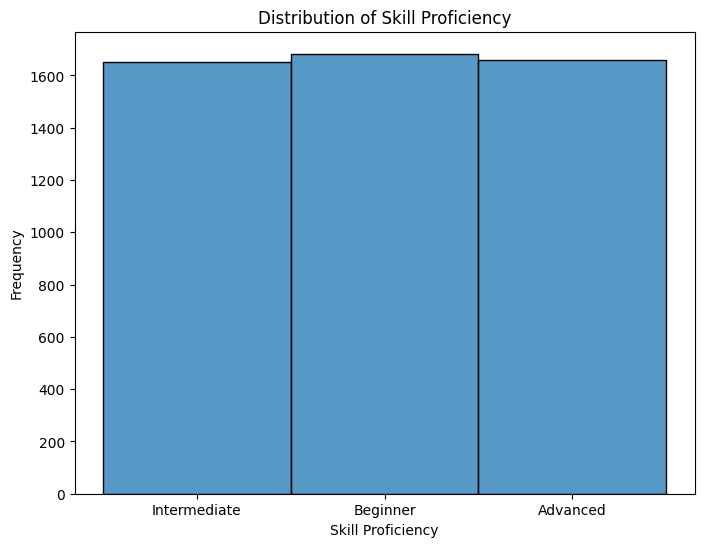

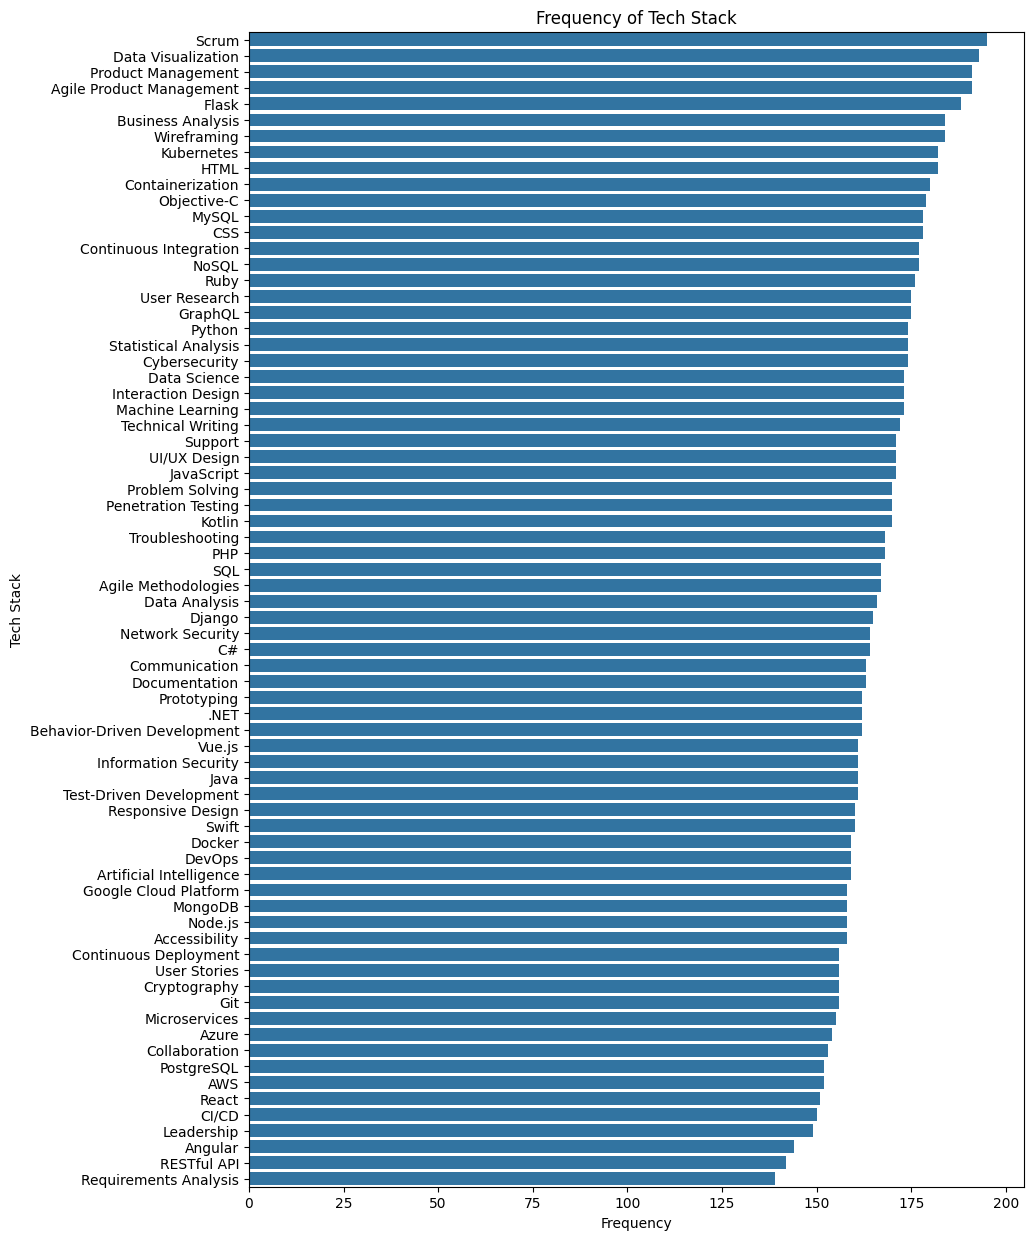

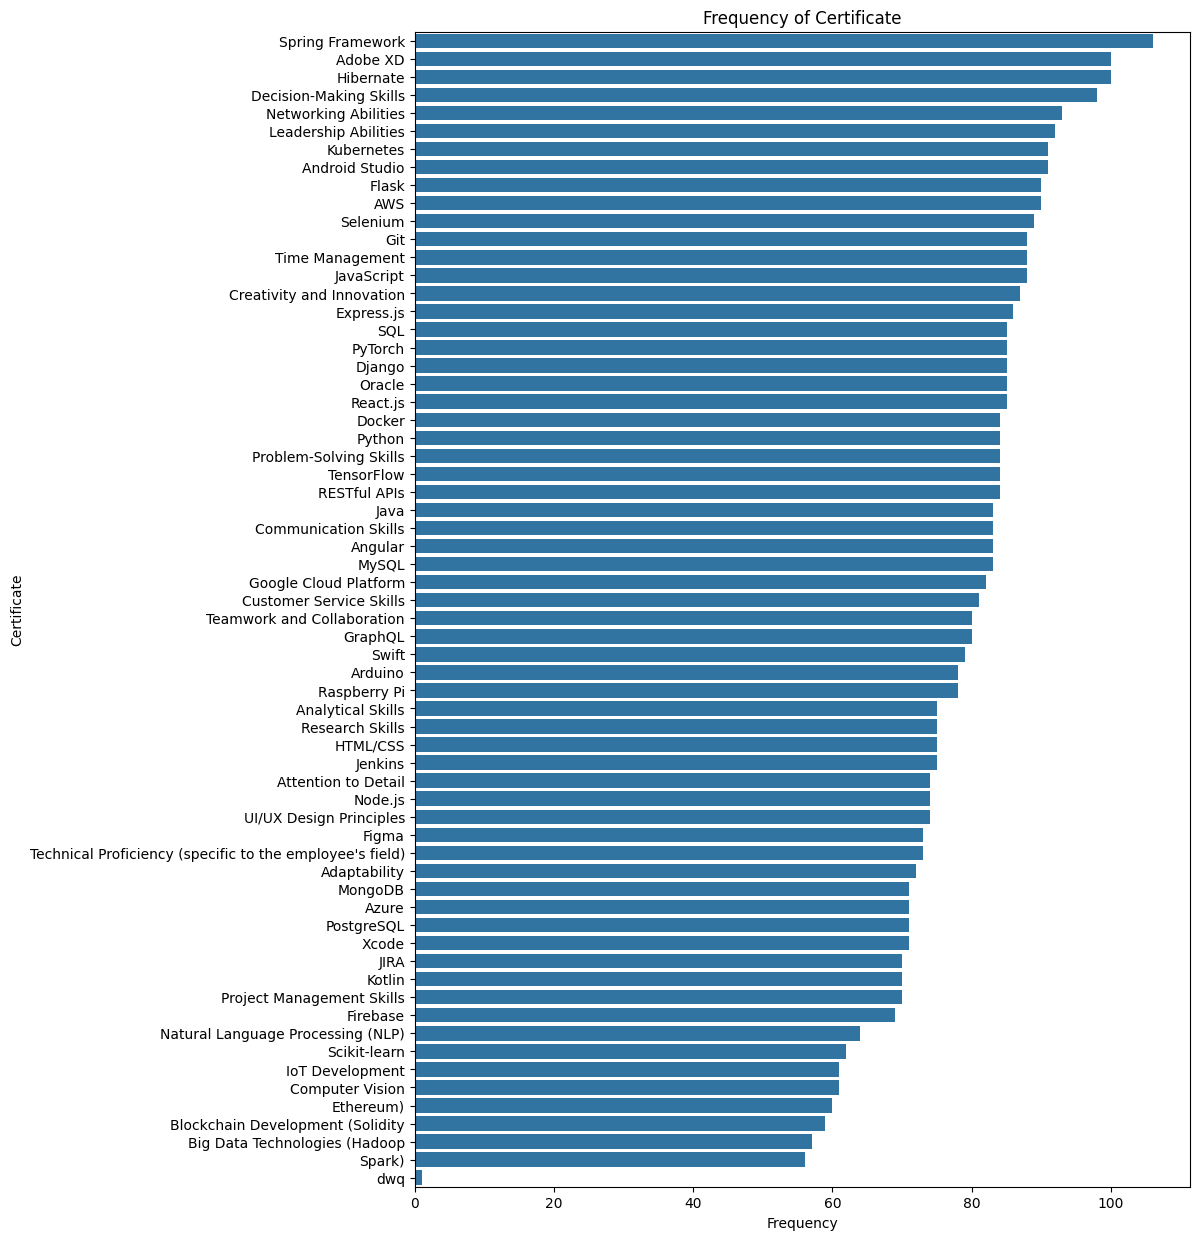

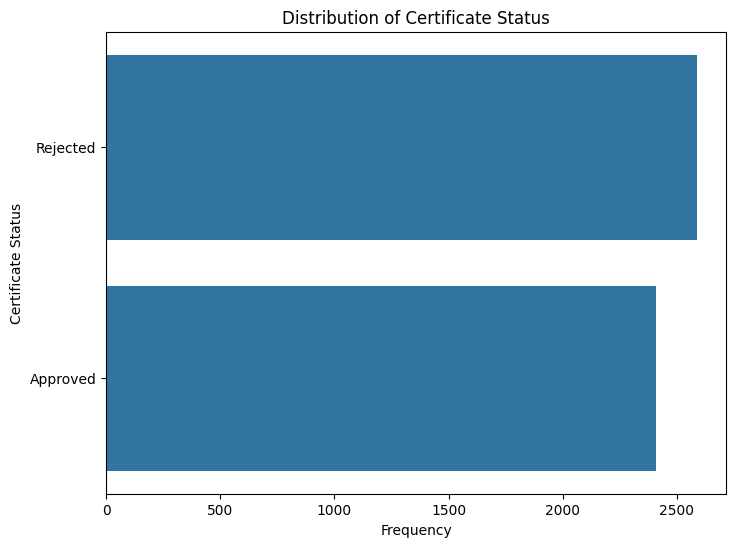

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for EMP_2 data

df = pd.DataFrame(merged_data)

# Splitting comma-separated strings into lists
df['certificate_name'] = df['certificate_name'].str.split(',')
df['certificate_status'] = df['certificate_status'].str.split(',')
df['skill_table'] = df['skill_table'].str.split(',')
df['skill_proficiency'] = df['skill_proficiency'].str.split(',')
df['tech_stack'] = df['tech_stack'].str.split(',')

# Summary Statistics
print("Summary Statistics:")
print(df.describe())

# Distribution of Categorical Data
print("\nDistribution of Certificate Name:")
print(df['certificate_name'].explode().value_counts())

print("\nDistribution of Certificate Status:")
print(df['certificate_status'].explode().value_counts())

print("\nDistribution of Skill Proficiency:")
print(df['skill_proficiency'].explode().value_counts())

print("\nDistribution of Tech Stack:")
print(df['tech_stack'].explode().value_counts())

# Data Visualization
# Histogram of Skill Proficiency
plt.figure(figsize=(8, 6))
sns.histplot(df['skill_proficiency'].explode(), bins=3, discrete=True)
plt.xlabel('Skill Proficiency')
plt.ylabel('Frequency')
plt.title('Distribution of Skill Proficiency')
plt.show()

# Bar plot of Tech Stack frequency
plt.figure(figsize=(10, 15))
sns.countplot(y=df['tech_stack'].explode(), order=df['tech_stack'].explode().value_counts().index)
plt.xlabel('Frequency')
plt.ylabel('Tech Stack')
plt.title('Frequency of Tech Stack')
plt.show()

# Bar plot of Certificate frequency
plt.figure(figsize=(10, 15))
sns.countplot(y=df['certificate_name'].explode(), order=df['certificate_name'].explode().value_counts().index)
plt.xlabel('Frequency')
plt.ylabel('Certificate')
plt.title('Frequency of Certificate')
plt.show()


# More EDA

# Distribution of Certificate Status
plt.figure(figsize=(8, 6))
sns.countplot(y=df['certificate_status'].explode(), order=df['certificate_status'].explode().value_counts().index)
plt.xlabel('Frequency')
plt.ylabel('Certificate Status')
plt.title('Distribution of Certificate Status')
plt.show()




In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import PorterStemmer
import numpy as np
import pandas as pd


# Convert dictionary to DataFrame
df = pd.DataFrame(merged_data)

# Apply stemming to the combined text of certificate_name, skill_name, and tech_stack
def stem_text(text):
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in text.split(',')]
    return ' '.join(stemmed_words)

df['combined_text'] = df['certificate_name'] + ',' + df['skill_table'] + ',' + df['tech_stack']
df['stemmed_text'] = df['combined_text'].apply(stem_text)

# Define required tech stack and proficiency
required_tech_stack = "NoSQL,Java"
required_proficiency = ["Advanced"]

# Create feature vector for required tech stack
proficiency_str = ','.join(required_proficiency)
# Create feature vector for required tech stack
required_tech_stack=required_tech_stack+ ',' +proficiency_str
required_tech_stack_vector = stem_text(required_tech_stack)

# Create feature vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['stemmed_text'])

# Calculate cosine similarity with the required tech stack vector
similarities = cosine_similarity(X, vectorizer.transform([required_tech_stack_vector]))

# Add similarity scores to DataFrame
df['similarity_score'] = similarities.flatten()

# Sort employees based on similarity score and select top 10
top_10_employees = df.nlargest(10, 'similarity_score')

# Print top 10 employee recommendations
print("Top 10 Employee Recommendations for the Project:")
print(top_10_employees[['EMP_ID', 'EMPName', 'similarity_score']])


Top 10 Employee Recommendations for the Project:
      EMP_ID            EMPName  similarity_score
788  EMP_789  Nicolas Woodrough          0.503962
414  EMP_415    Herta Kovelmann          0.424729
899  EMP_900    Letty Collabine          0.328647
377  EMP_378   Erminia Dimbylow          0.319935
2      EMP_3    Margaux Aveyard          0.318052
217  EMP_218      Ellie Gadault          0.316119
227  EMP_228     Herve Bertelet          0.309277
74    EMP_75   Bearnard Batting          0.297724
935  EMP_936    Haydon Percival          0.288699
43    EMP_44      Antony Somner          0.272421


In [32]:
# # Split data into training and test sets
# from sklearn.model_selection import train_test_split
# train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# # Define ground truth for test set
# # For example, let's assume you have a column in your dataframe indicating if an employee is a good recommendation or not
# # You can label your test set accordingly
# # Example ground truth labels for the test set
# ground_truth_labels = [1, 0, 1, 0, 1, 0, 1, 1, 0, 1]

# test_df['is_good_recommendation'] = ground_truth_labels

# # Create feature vectors for test set
# X_test = vectorizer.transform(test_df['stemmed_text'])

# # Calculate cosine similarity with required tech stack vector for test set
# test_similarities = cosine_similarity(X_test, vectorizer.transform([required_tech_stack_vector]))

# # Add similarity scores to test DataFrame
# test_df['similarity_score'] = test_similarities.flatten()

# # Sort test set based on similarity score and select top 10
# top_10_test_employees = test_df.nlargest(10, 'similarity_score')

# # Evaluate model performance

# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(test_df['is_good_recommendation'], )
# print("Accuracy:", accuracy)


In [33]:
# Your model is a content-based recommendation system that suggests employees for a project based on their similarity to a required set of skills and proficiencies. Here's how it works:

# 1. **Data Preparation**:
#    - You start by converting your data (presumably containing information about employees, their skills, certificates, and technology stacks) into a DataFrame format using Pandas.

# 2. **Text Processing**:
#    - You combine relevant textual features like certificate names, skill names, and technology stacks into a single text field.
#    - Then, you apply stemming to this combined text. Stemming reduces words to their root form, which helps in capturing semantic similarity.

# 3. **Vectorization**:
#    - You use TF-IDF (Term Frequency-Inverse Document Frequency) vectorization to convert the textual data into numerical vectors.
#    - This process represents each document (in this case, each employee's combined text) as a vector where each dimension represents the importance of a word in the document relative to the entire corpus.

# 4. **Similarity Calculation**:
#    - You calculate the cosine similarity between each employee's vector representation and the vector representation of the required tech stack.
#    - Cosine similarity measures the cosine of the angle between two vectors and ranges from -1 to 1, where higher values indicate greater similarity.

# 5. **Recommendation**:
#    - You add the similarity scores to your DataFrame and sort the DataFrame based on these scores to find the top similar employees.
#    - Finally, you select the top N (in this case, top 10) employees as recommendations for the project.

# 6. **Evaluation**:
#    - To evaluate the model's performance, you split your data into training and test sets.
#    - You define ground truth labels indicating whether each employee is a good recommendation or not.
#    - You use the model to make predictions for the test set and compare these predictions with the ground truth labels to compute metrics such as accuracy.

# This model is suitable for scenarios where you have textual data describing employees' skills, certificates, and technology stacks, and you want to recommend employees based on their similarity to a required set of skills and proficiencies. It leverages techniques from natural language processing (NLP) and information retrieval to make these recommendations.